# Importing Dependencies required for our project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [2]:
#importing data and preprocessing it

In [3]:
df = pd.read_csv('C:/Users/Priyanka/Downloads/calories.csv' , header = 0 )

In [4]:
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df_a = pd.read_csv('C:/Users/Priyanka/Downloads/exercise.csv' , header = 0 )

In [6]:
df_a.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
cal_df = pd.concat([df_a,df['Calories']], axis=1)

In [8]:
cal_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [17]:
cal_df.shape

(15000, 9)

In [19]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
cal_df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
cal_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

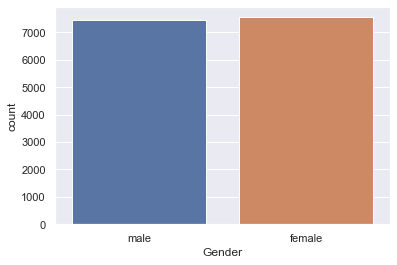

In [12]:
sns.countplot(cal_df['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

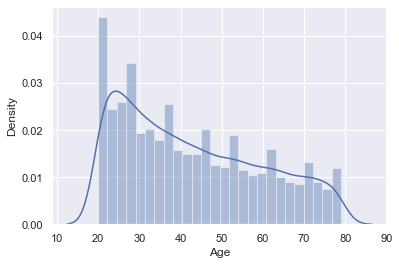

In [13]:
sns.distplot(cal_df['Age'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

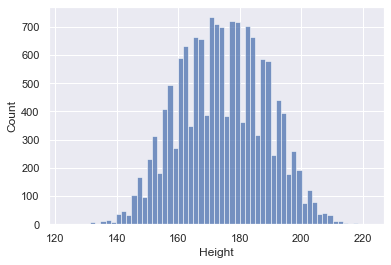

In [14]:
sns.histplot(cal_df['Height'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

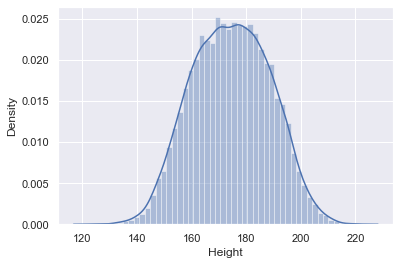

In [16]:
sns.distplot(cal_df['Height'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

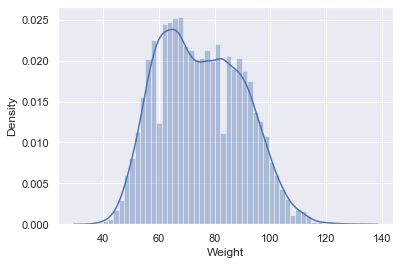

In [17]:
sns.distplot(cal_df['Weight'])

In [22]:
cal_df= pd.get_dummies(cal_df)

In [23]:
cal_df.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,1,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,1,0


In [24]:
del cal_df['Gender_female']

In [25]:
cal_df.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,0


In [26]:
correlation = cal_df.corr()

<AxesSubplot:>

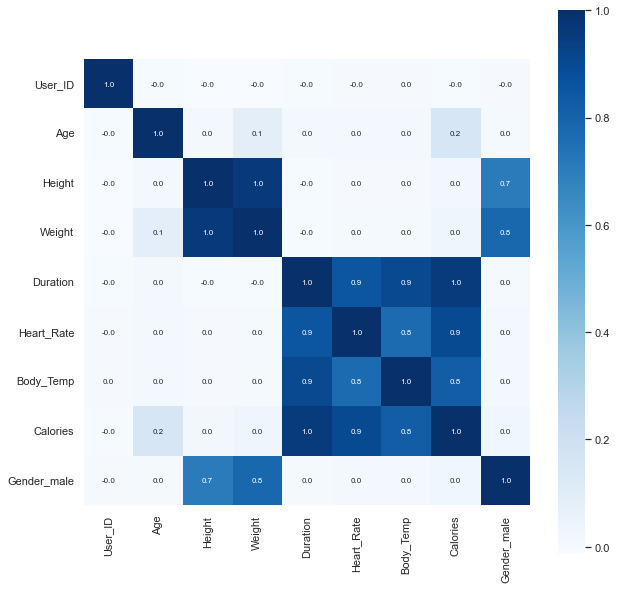

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [28]:
x= cal_df.drop(columns=['User_ID','Calories'], axis= 1)
y= cal_df['Calories']

In [29]:
x.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,1
1,20,166.0,60.0,14.0,94.0,40.3,0
2,69,179.0,79.0,5.0,88.0,38.7,1
3,34,179.0,71.0,13.0,100.0,40.5,0
4,27,154.0,58.0,10.0,81.0,39.8,0


In [30]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [31]:
x_train, x_test , y_train, y_test = train_test_split(x ,y, test_size=0.2,random_state=2)

In [32]:
x_train.shape

(12000, 7)

In [45]:
x_test.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
7592,41,172.0,74.0,24.0,98.0,40.8,0
3551,70,189.0,96.0,24.0,113.0,40.9,1
9698,53,173.0,68.0,7.0,96.0,39.3,0
3759,36,191.0,96.0,2.0,82.0,38.4,1
2353,46,169.0,68.0,20.0,111.0,40.6,0


In [34]:
x.shape

(15000, 7)

In [35]:
model = XGBRegressor()

In [36]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [37]:
y_pred = model.predict(x_test)

In [40]:
Rmse = metrics.r2_score(y_test, y_pred)

In [41]:
mae = metrics.mean_absolute_error(y_test, y_pred)

In [43]:
Rmse

0.9988455802289196

In [44]:
mae

1.480544296960036